# Topic Modelling Latent Semantic Analysis (LSA) Python mengenai Wisata Madura

Pesatnya pertumbuhan teks saat ini yang diperoleh dari konten buatan pengguna, mengekstraksi informasi dari opini pengguna dalam bentuk teks tidak terstruktur sangat membantu dalam pembuatan strategi bisnis. Dalam penelitian ini, Saya menyelidiki model topik untuk ulasan Google Maps mengenai Pulau Madura.
Topic Modelling adalah metode pembelajaran tanpa pengawasan yang mendeteksi pola seperti frekuensi kata dan jarak antar kata, lalu mengelompokkan kata serupa yang sering muncul. Dengan mengekstrak 250 ulasan dari Google Maps dan menggunakan algoritma Latent Semantic Analysis, diperoleh 10 kata yang mewakili topik kuat yang sering muncul dalam ulasan pengguna. Dengan teknik ini, kita bisa menyimpulkan dengan cepat apa pendapat pengguna tentang Pulau Madura

## Library

In [1]:
%%capture
!pip install numpy

In [2]:
%%capture
!pip install pandas

In [3]:
%%capture
!pip install nltk

In [4]:
%%capture
!pip install scikit-learn

In [5]:
%%capture
!pip install Sastrawi

In [6]:
import numpy as np
#Library untuk mengelola data dalam Dataframe
import pandas as pd

#Lbrary untuk Preprocessing
import nltk
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize # tokenizing

#Untuk membuat vektor dan TFIDF
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer

#Untuk melakukan proses SVD
from sklearn.decomposition import TruncatedSVD

#Untuk visualisasi
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Membuat Dataframe

Dataframe yang dipakai adalah hasil Crawling dari Google Maps mengenai wisata di Pulau Madura

In [7]:
#Membuat Dataframe
dataReview = pd.read_csv('https://raw.githubusercontent.com/RizkiAshPrat/Wisata-Madura/main/Review%20GMaps%20Madura.csv')

#Menampilkan dataBerita
dataReview

,query,name,google_id,place_id,location_link,reviews_link,reviews_per_score,reviews,rating,review_id,...,review_img_url,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id
0,https://www.google.com/maps/place/Pulau+Madura...,Pulau Madura,0x2dd9d3445c8704d1:0x5a2751be1dfcce84,ChIJ0QSHXETT2S0RhM78Hb5RJ1o,https://www.google.com/maps/place/Pulau+Madura...,https://search.google.com/local/reviews?placei...,"{""1"": 319, ""2"": 104, ""3"": 245, ""4"": 490, ""5"": ...",4282,4.4,ChZDSUhNMG9nS0VJQ0FnSUMydE5pZVpnEAE,...,https://lh5.googleusercontent.com/p/AF1QipPdUK...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5,1649873513,04/13/2022 18:11:53,6,6496250864493973124
1,https://www.google.com/maps/place/Pulau+Madura...,Pulau Madura,0x2dd9d3445c8704d1:0x5a2751be1dfcce84,ChIJ0QSHXETT2S0RhM78Hb5RJ1o,https://www.google.com/maps/place/Pulau+Madura...,https://search.google.com/local/reviews?placei...,"{""1"": 319, ""2"": 104, ""3"": 245, ""4"": 490, ""5"": ...",4282,4.4,ChdDSUhNMG9nS0VJQ0FnSUNPMGNXZnhBRRAB,...,https://lh5.googleusercontent.com/p/AF1QipN98h...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5,1656655751,07/01/2022 06:09:11,0,6496250864493973124
2,https://www.google.com/maps/place/Pulau+Madura...,Pulau Madura,0x2dd9d3445c8704d1:0x5a2751be1dfcce84,ChIJ0QSHXETT2S0RhM78Hb5RJ1o,https://www.google.com/maps/place/Pulau+Madura...,https://search.google.com/local/reviews?placei...,"{""1"": 319, ""2"": 104, ""3"": 245, ""4"": 490, ""5"": ...",4282,4.4,ChZDSUhNMG9nS0VJQ0FnSUNtd1lickhREAE,...,https://lh5.googleusercontent.com/p/AF1QipPVzT...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5,1640882669,12/30/2021 16:44:29,11,6496250864493973124
3,https://www.google.com/maps/place/Pulau+Madura...,Pulau Madura,0x2dd9d3445c8704d1:0x5a2751be1dfcce84,ChIJ0QSHXETT2S0RhM78Hb5RJ1o,https://www.google.com/maps/place/Pulau+Madura...,https://search.google.com/local/reviews?placei...,"{""1"": 319, ""2"": 104, ""3"": 245, ""4"": 490, ""5"": ...",4282,4.4,ChdDSUhNMG9nS0VJQ0FnSUNHaGNYOHlBRRAB,...,https://lh5.googleusercontent.com/p/AF1QipOF0B...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,4,1635979875,11/03/2021 22:51:15,11,6496250864493973124
4,https://www.google.com/maps/place/Pulau+Madura...,Pulau Madura,0x2dd9d3445c8704d1:0x5a2751be1dfcce84,ChIJ0QSHXETT2S0RhM78Hb5RJ1o,https://www.google.com/maps/place/Pulau+Madura...,https://search.google.com/local/reviews?placei...,"{""1"": 319, ""2"": 104, ""3"": 245, ""4"": 490, ""5"": ...",4282,4.4,ChZDSUhNMG9nS0VJQ0FnSUR3bUlELUVBEAE,...,https://lh5.googleusercontent.com/p/AF1QipMJpU...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5,1652348910,05/12/2022 09:48:30,5,6496250864493973124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,https://www.google.com/maps/place/Pulau+Madura...,Pulau Madura,0x2dd9d3445c8704d1:0x5a2751be1dfcce84,ChIJ0QSHXETT2S0RhM78Hb5RJ1o,https://www.google.com/maps/place/Pulau+Madura...,https://search.google.com/local/reviews?placei...,"{""1"": 319, ""2"": 104, ""3"": 245, ""4"": 490, ""5"": ...",4282,4.4,ChdDSUhNMG9nS0VJQ0FnSUNBNE5fZzJBRRAB,...,https://lh5.googleusercontent.com/p/AF1QipOqK8...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5,1496725504,06/06/2017 05:05:04,0,6496250864493973124
246,https://www.google.com/maps/place/Pulau+Madura...,Pulau Madura,0x2dd9d3445c8704d1:0x5a2751be1dfcce84,ChIJ0QSHXETT2S0RhM78Hb5RJ1o,https://www.google.com/maps/place/Pulau+Madura...,https://search.google.com/local/reviews?placei...,"{""1"": 319, ""2"": 104, ""3"": 245, ""4"": 490, ""5"": ...",4282,4.4,ChdDSUhNMG9nS0VJQ0FnSUNRNDkzS3B3RRAB,...,https://lh3.googleusercontent.com/a-/AFdZucoCZ...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,4,1522469138,03/31/2018 04:05:38,2,6496250864493973124
247,https://www.google.com/maps/place/Pulau+Madura...,Pulau 

## Text Preprocessing

Text Prepocessing yang dilakukan pada kali ini meliputi:
1. Case Folding
2. Tokenizing
3. StopWord

###  Case Folding

Case Folding merupakan tahap untuk konversi text menjadi suatu bentuk yang standar. Pada tahap ini biasanya untuk membuat huruf kapital menjadi lowercase

In [8]:
#Case Folding untuk membuat huruf menjadi non kapital
dataReview['review_text'] = dataReview['review_text'].str.lower()

#Menampilkan Hasil Casefolding pada kolom Abstrak
dataReview['review_text']

0      madura ya,, sampeyan mau ke madura? tempat yg ...
1      wisata lokal buat yang minim buged disini temp...
2      lokasinya di lerpak desa di antara banyak nya ...
3      belum destinasi terlalu jauh dan berkunjung wa...
4      madura adalah sebuah pulau yg terdiri dari emp...
                             ...                        
245                     madura...!!! harta berlian kita.
246    pulau madura dikenal juga dengan pulau garam k...
247                                            ok mantap
248    banyak tempat wisata dan budaya yang menarik, ...
249    dateng dulu kesini baru bisa menilai. karena d...
Name: review_text, Length: 250, dtype: object

### Tokenizing

Tokenizing merupakan tahap yang digunakan untuk melakukan pemecahan perkata pada fungsi word_tokenize() melalui Library NLTK. Selain itu pada tahap ini juga melakukan:
1. Menghapus Karakter Spesial<br>
   Pada fungsi remove_PTA_special(text), untuk menghapus karakter berupa tab, karakter non ASCII, mention, link, hastagh, dan URL yang tidak lengkap.
2. Menghapus Angka<br>
   Pada fungsi remove_number(text), untuk menghapus karakter berupa angka.
3. Menghapus Punctuation.<br>
   Menggunaan fungsi remove_punctuation() untuk mengganti sting.punctuation berupa (!"#$%&\’()*+,-./:;<=>?@[\\]^_`{|}~) dengan "".
4. Menghapus Ruang Kosong<br>
   Pada fungsi remove_whitespace_multiple()
5. Menghapus Karakter Single<br>
   Menggunakan fungsi remove_singl_char

In [9]:
import nltk
nltk.download('punkt')
#Untuk menghapus angka
import re

#Untuk menghilangkan Punctuation
import string

def remove_PTA_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

dataReview['review_text'] = dataReview['review_text'].apply(remove_PTA_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

dataReview['review_text'] = dataReview['review_text'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

dataReview['review_text'] = dataReview['review_text'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

dataReview['review_text'] = dataReview['review_text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

dataReview['review_text'] = dataReview['review_text'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

dataReview['review_text'] = dataReview['review_text'].apply(remove_singl_char)

# NLTK word tokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

dataReview['review_text'] = dataReview['review_text'].apply(word_tokenize_wrapper)
dataReview['review_text']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0      [madura, ya, sampeyan, mau, ke, madura, tempat...
1      [wisata, lokal, buat, yang, minim, buged, disi...
2      [lokasinya, di, lerpak, desa, di, antara, bany...
3      [belum, destinasi, terlalu, jauh, dan, berkunj...
4      [madura, adalah, sebuah, pulau, yg, terdiri, d...
                             ...                        
245                       [madura, harta, berlian, kita]
246    [pulau, madura, dikenal, juga, dengan, pulau, ...
247                                         [ok, mantap]
248    [banyak, tempat, wisata, dan, budaya, yang, me...
249    [dateng, dulu, kesini, baru, bisa, menilai, ka...
Name: review_text, Length: 250, dtype: object

### Stopword

Stopword bertujuan untuk mengambil kata-kata penting pada tokens yang dihasilkan oleh proses sebelumnya. Kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna disebut Stopword. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll.<br>

Stopword yang digunakan menggunakan fungsi stopword_removal(words), sedangkan list stopword bahasa Indonesia diatur menggunakan Library NLTK pada stopwords.words('indonesian').

In [38]:
nltk.download('stopwords')
#Mendapatkan stopword indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwordsSastrawi = factory.get_stop_words()
list_stopwords = stopwords.words('indonesian')
more_stopwords = ['yg', 'sampeyan', 'dg', 'nya', 'nan', 'hehe']

#Menghapus Stopword dari list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords and word not in more_stopwords and word not in stopwordsSastrawi]
dataReview['review_text'] = dataReview['review_text'].apply(stopwords_removal)

dataReview['review_text']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0      [madura, madura, pas, rekreasi, madura, lihat,...
1      [wisata, lokal, minim, buged, tempatnya, air, ...
2      [lokasinya, lerpak, desa, desa, dibangkalan, t...
3                         [destinasi, berkunjung, malam]
4      [madura, pulau, kabupaten, bangkalan, sampang,...
                             ...                        
245                             [madura, harta, berlian]
246    [pulau, madura, dikenal, pulau, garam, penghas...
247                                             [mantap]
248    [wisata, budaya, menarik, kunjungi, madura, te...
249    [dateng, kesini, menilai, madura, kabupaten, d...
Name: review_text, Length: 250, dtype: object

In [39]:
#simpan jadi csv
#Nama file : TextProcessing.csv
dataReview.to_csv('TextPreprocessingWisataMadura.csv')

## TF-IDF

TF-IDF (term frequency-inverse document frequency) adalah ukuran statistik yang mengevaluasi seberapa relevan sebuah kata dengan dokumen dalam kumpulan dokumen.<br>
TF-IDF untuk sebuah kata dalam dokumen dihitung dengan mengalikan dua metrik TF dan IDF.<br>
* TF(Term Frequency) : Istilah frekuensi kata dalam dokumen. Ada beberapa cara untuk menghitung frekuensi ini, dengan cara yang paling sederhana adalah dengan menghitung jumlah kata yang muncul dalam dokumen. Lalu, ada cara untuk menyesuaikan frekuensi, berdasarkan panjang dokumen, atau dengan frekuensi mentah kata yang paling sering muncul dalam dokumen.

$$
t f(t, d)=\log (1+\text { freq }(t, d))
$$
<br>
<b>Keterangan:</b><br>
t : Term<br>
d : document<br>


* IDF(Inverse Document Frequency): Ini berarti, seberapa umum atau jarang sebuah kata di seluruh kumpulan dokumen. Semakin dekat ke 0, semakin umum sebuah kata. Metrik ini dapat dihitung dengan mengambil jumlah total dokumen, membaginya dengan jumlah dokumen yang berisi kata, dan menghitung logaritma.

$$
i d f(t, D)=\log \left(\frac{N}{\operatorname{count}(d \in D: t \in d)}\right)
$$
<br>

<b>Keterangan:</b><br>
N : total dokumen<br>

$$
(d \in D: t \in d) = \mathrm{df}_{t}
$$

dft : jumlah kemunculan term (tj) dalam dokumen<br>


Sehingga, untuk TF-IDF rumusnya adalah sebagai berikut :

$$
t f i d f(t, d, D)=t f(t, d), i d f(t, D)
$$

In [90]:
#Membuat Dataframe
dataTextPre = pd.read_csv('https://raw.githubusercontent.com/RizkiAshPrat/Wisata-Madura/main/TextPreprocessingWisataMadura.csv')
vectorizer = CountVectorizer(min_df=1)
bag = vectorizer.fit_transform(dataTextPre['review_text'])

In [91]:
#Menampilkan Vocabulary dengan indeks Vocabnya
print(vectorizer.vocabulary_)

{'madura': 659, 'pas': 869, 'rekreasi': 1005, 'lihat': 635, 'pemandangan': 892, 'kampung': 479, 'asri': 49, 'spot': 1115, 'destinasi': 255, 'wisata': 1311, 'penduduk': 900, 'ramah': 992, 'insyaallah': 423, 'betah': 172, 'lokal': 643, 'minim': 780, 'buged': 196, 'tempatnya': 1178, 'air': 13, 'terjun': 1211, 'toroan': 1252, 'lokasinya': 646, 'lerpak': 626, 'desa': 253, 'dibangkalan': 262, 'ornagnya': 843, 'klo': 564, 'helling': 390, 'suka': 1129, 'si': 1091, 'tenang': 1183, 'banged': 74, 'religinya': 1007, 'berkunjung': 137, 'malam': 670, 'pulau': 978, 'kabupaten': 470, 'bangkalan': 80, 'sampang': 1035, 'pamekasan': 854, 'sumenep': 1136, 'ujung': 1274, 'timur': 1238, 'terkenal': 1214, 'religi': 1006, 'kearifan': 502, 'lokalnya': 644, 'kaya': 496, 'bahasa': 65, 'budaya': 193, 'logat': 641, 'istilah': 432, 'hedhakamu': 389, 'kakehkamu': 472, 'beengkamu': 104, 'beknakamu': 106, 'kota': 575, 'beda': 103, 'settong': 1087, 'dhara': 258, 'salam': 1031, 'damai': 236, 'anak': 35, 'jembatan': 453,

In [66]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)

    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

Menampilkan 10 kata teratas yang sering muncul pada ulasan google maps mengenai wisata pulau madura beserta dengan jumlah kemunculannya masing-masing:
1. madura = 212
2. pulau = 188
3. wisata = 90
4. pantai = 49
5. indah = 47
6. kabupaten = 40
7. sumenep = 40
8. timur = 29
9. orang = 28
10. ramah = 27

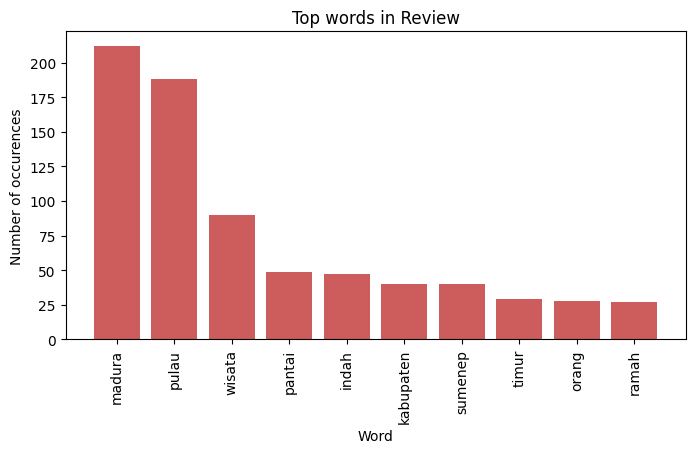

In [92]:
words, word_values = get_top_n_words(n_top_words=10,
                                     count_vectorizer=vectorizer,
                                     text_data=dataTextPre['review_text'])

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(range(len(words)), word_values, color='indianred');
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in Review');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

Menampilkan 1000 kata teratas yang sering muncul pada ulasan google maps mengenai wisata pulau madura dalam bentuk Wordcloud, dimana semakin besar ukuran kata tersebut mengindikasikan semakin banyak kata tersebut muncul pada ulasan.
Misalkan kata *sumenep* lebih banyak muncul dibandingkan kata *pamekasan* atau *sampang*

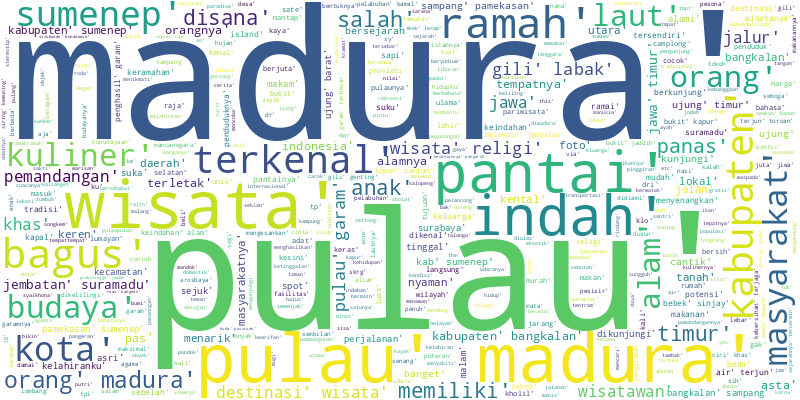

In [93]:
all_headlines = ','.join(list(dataTextPre['review_text']))

wordcloud = WordCloud(max_words=10000, background_color="white", contour_width=10, contour_color="red", width=800, height=400).generate(all_headlines)

wordcloud.generate(all_headlines)
wordcloud.to_image()

### TF

In [94]:
#Menunjukkan matriks dengan ukuran dokumen*kata
matrik_vsm=bag.toarray()
matrik_vsm.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(250, 1325)

In [70]:
matrik_vsm[0]

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
a=vectorizer.get_feature_names_out()

Menampilkan vektor kemunculan kata di setiap dokumennya

In [72]:
print(len(matrik_vsm[:,1]))
#dfb =pd.DataFrame(data=matrik_vsm,index=df,columns=[a])
dataTF =pd.DataFrame(data=matrik_vsm,index=list(range(1, len(matrik_vsm[:,1])+1, )),columns=[a])
dataTF

250


,aamiin,abadikan,abhantal,adat,adatnya,adiluhung,adlh,agama,agamis,ago,...,wonderful,wow,wwoooww,yaitubangkalansampangpamekasandansumenep,yaman,years,yes,yos,yusuf,ziarah
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [73]:
DataTFIDF = TfidfVectorizer()
TFIDF=DataTFIDF.fit_transform(dataTextPre['review_text']).toarray()
TFIDF=pd.DataFrame(TFIDF)
TFIDF

,0,1,2,3,4,5,6,7,8,9,...,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## LSA

Latent Semantic Analysis(LSA), adalah salah satu teknik dasar dalam pemodelan topik. Ide intinya adalah mengambil matriks dari dokumen dan istilah(term) dan menguraikannya menjadi matriks topik-dokumen(Matriks U) dan matriks topik-term(Matriks V) yang terpisah.<br>
Model LSA dapat menggunakan input dalam matriks dengan skor tf-idf.

### SVD

LSA pada dasarnya adalah dekomposisi nilai tunggal(SVD).<br>

SVD menguraikan DTM asli menjadi tiga matriks, yaitu Matriks U, S, dan V Transpose. Di sini matriks U menunjukkan matriks dokumen-topik sementara (V) adalah matriks topik-term.

$$
\mathbf{A}_{n x p}=\mathbf{U}_{n x n} \mathrm{~S}_{n x p} \mathbf{V}_{p x p}^{\mathrm{T}}
$$

Matriks A yang digunakan disini merupakan Matriks TF-IDF
<br>

Setiap baris dari matriks U (matriks topik dokumen) adalah representasi vektor dari dokumen yang sesuai atau kontribusi dari topik terhadap dokumen. Panjang vektor ini adalah jumlah topik yang diinginkan.<br>
Representasi vektor untuk suku-suku dalam data dapat ditemukan dalam matriks V (matriks istilah(term)-topik) atau kontribusi term terhadap topik.<br>

SVD pada Python dapat dicari menggunakan Library dari numpy yaitu linalg.svd()

In [74]:
u, s, vT = np.linalg.svd(TFIDF, full_matrices=False)

#### Matriks U

Matriks U merupakan nilai eigenvector dari operasi perkalian,

$$
A \cdot A^{T}
$$

Matriks U akan ditampilkan dalam jumlah 10 baris, sedangkan kolomnya tetap. Karena sesuai dengan topik yang dipilih adalah 10 dan kontribusi dari topik terhadap dokumen. Barisnya menunjukkan topik sedangkan kolomnya menujukkan dokumen.

In [75]:
print("Matriks U")
u = pd.DataFrame(u)
u.iloc[:10,:]

Matriks U


,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0.069590,-0.057039,-0.082489,0.090462,-0.065856,0.019919,-0.018535,0.034993,-0.060424,0.046148,...,-0.063538,0.054759,-0.010080,0.016977,-0.015872,-9.066714e-18,-3.654766e-19,-4.271309e-18,-1.441749e-18,3.941911e-19
1,0.029250,0.047392,-0.053149,0.059663,0.063505,-0.036142,0.019946,-0.016268,-0.029718,0.026503,...,-0.030080,-0.017343,-0.049232,0.042097,0.010114,6.206127e-17,-2.554313e-17,-7.430706e-17,5.504319e-17,3.637745e-16
2,0.031750,0.012552,-0.044301,0.069604,-0.021340,0.030594,0.015266,0.023270,-0.030223,0.024900,...,-0.000112,0.001614,-0.007176,0.010397,-0.000514,8.183093e-17,4.889834e-17,-2.982025e-17,3.777948e-17,1.127012e-17
3,0.016092,-0.006062,-0.052488,0.021489,0.011701,-0.018879,0.089528,0.035172,0.016958,-0.001852,...,-0.026900,-0.036310,0.095932,-0.036885,-0.002149,-1.070100e-17,1.364333e-16,-2.891115e-17,-8.739068e-17,-1.756946e-16
4,0.106715,-0.122894,-0.057879,-0.002544,0.091302,0.058240,-0.003764,0.011809,0.183521,0.001963,...,-0.046997,0.006456,0.004796,0.035874,-0.012590,-3.209584e-17,-6.844404e-17,-2.878813e-18,-4.197109e-17,2.850589e-17
5,0.060229,-0.081061,-0.026029,0.023451,-0.050056,-0.167323,0.281434,0.114463,-0.050219,-0.016337,...,0.008564,-0.042622,0.054724,0.010339,-0.022285,3.599153e-17,6.349405e-17,1.239159e-16,-1.378297e-18,-1.913390e-16
6,0.040384,0.096889,-0.236728,-0.133519,-0.006422,-0.075989,-0.136703,0.148648,0.055865,0.051767,...,0.080803,0.050401,-0.009001,0.017514,0.006237,-4.731668e-16,-8.347837e-17,-1.832266e-16,-1.060950e-16,-1.162071e-17
7,0.026180,-0.046405,-0.012595,0.036927,-0.038397,-0.035626,-0.022146,-0.005618,0.003329,0.027602,...,-0.000151,-0.003132,-0.007113,0.005809,-0.008320,-3.937309e-17,4.024046e-17,-4.715290e-17,-7.671389e-17,2.889899e-17
8,0.008252,-0.004310,0.003678,0.001532,0.009062,0.002770,0.034333,-0.014397,0.035546,0.008344,...,0.029140,0.032293,0.058450,-0.013357,-0.007259,-2.639630e-17,1.572699e-17,-3.921997e-17,3.558067e-17,1.760562e-16
9,0.037869,-0.000340,0.037425,-0.042943,-0.030004,0.133380,0.003807,-0.006786,-0.064489,-0.033770,...,0.012283,-0.002059,0.001197,-0.000314,-0.000811,4.296482e-17,9.719545e-17,1.351992e-17,4.644045e-17,-1.568355e-16


In [76]:
u.shape

(250, 250)

#### Matriks S

Matriks S merupakan nilai akar eigenvalue dari perkalian,

$$
A^{T} \cdot A
$$

atau,

$$
A \cdot A^{T}
$$

Nilai eigenvalue diurutkan secara diagonal dari besar ke kecil.

In [77]:
print("\nMatriks S")
print(s)
# Membuat m x n Sigma matrix dari s
Sigma = np.zeros((TFIDF.shape[0], TFIDF.shape[0]))
# populate Sigma with n x n diagonal matrix
Sigma[:TFIDF.shape[1], :TFIDF.shape[1]] = np.diag(s)
Sigma=pd.DataFrame(Sigma)


Matriks S
[3.37898510e+00 2.13139954e+00 1.97911715e+00 1.88305079e+00
 1.84130445e+00 1.70657732e+00 1.66218032e+00 1.61795553e+00
 1.60215660e+00 1.56729077e+00 1.55973723e+00 1.48668573e+00
 1.46066562e+00 1.43098904e+00 1.42265856e+00 1.40530797e+00
 1.39144714e+00 1.37991051e+00 1.37350873e+00 1.34760456e+00
 1.33615818e+00 1.32904571e+00 1.32330835e+00 1.30962602e+00
 1.30256309e+00 1.29372195e+00 1.29074849e+00 1.27095583e+00
 1.26710433e+00 1.25019505e+00 1.24709775e+00 1.23794590e+00
 1.22928724e+00 1.22231586e+00 1.21373990e+00 1.20626661e+00
 1.20089400e+00 1.19632394e+00 1.19097884e+00 1.17948939e+00
 1.17597973e+00 1.17235682e+00 1.16935379e+00 1.16426732e+00
 1.15189880e+00 1.14826554e+00 1.14774745e+00 1.14281044e+00
 1.14171527e+00 1.13604623e+00 1.13124788e+00 1.12396088e+00
 1.11995580e+00 1.11759351e+00 1.11290013e+00 1.11015029e+00
 1.09904549e+00 1.09409438e+00 1.08965022e+00 1.08693820e+00
 1.08503823e+00 1.07730723e+00 1.07686975e+00 1.06988211e+00
 1.06703229e+

In [78]:
s.shape

(250,)

In [79]:
#Matriks S Diagonal
Sigma

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,3.378985,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000,2.1314,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000,0.0000,1.979117,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000,0.0000,0.000000,1.883051,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000,0.0000,0.000000,0.000000,1.841304,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.506810e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
246,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,4.440760e-16,0.000000e+00,0.000000e+00,0.000000e+00
247,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,2.538298e-16,0.000000e+00,0.000000e+00
248,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.472790e-16,0.000000e+00


#### Matriks vT

Matriks V Transpose merupakan nilai eigenvector dari operasi perkalian,

$$
A^{T} \cdot A
$$

Matriks V Transpose kolomnya akan ditampilkan sebanyak 10 saja, sedangkan barisnya tetap. Karena topik yang dipilih berjumlah 10 dan menunjukan kontribusi term terhadap topik. Barisnya menunjukkan Term sedangkan kolomnya menunjukkan Topik.

In [80]:
print("Matriks V Transpose")
vT=pd.DataFrame(vT)
print(vT.shape)

Matriks V Transpose
(250, 1326)


In [81]:
vT.iloc[:,0:11]

,0,1,2,3,4,5,6,7,8,9,10
0,1.447618e-03,0.000464,0.003739,0.013381,0.006343,0.003746,0.010858,0.013778,0.005730,0.001044,0.004469
1,-4.224402e-03,0.001859,-0.007484,-0.002672,-0.009492,-0.005441,-0.017475,-0.006063,-0.001385,0.001001,-0.000355
2,-1.037048e-03,-0.005455,-0.000598,0.022881,-0.007347,-0.002024,0.006888,0.005229,-0.011733,-0.003906,-0.002179
3,2.011581e-03,-0.003057,0.001983,-0.025062,0.007409,0.003614,0.000975,-0.028281,0.006960,0.002086,-0.002750
4,-1.946295e-03,-0.000628,-0.003249,-0.014989,-0.023361,-0.008170,-0.017374,-0.016257,0.001825,-0.005769,0.012517
...,...,...,...,...,...,...,...,...,...,...,...
245,-8.999759e-04,-0.000593,0.000227,0.001090,0.008801,0.001346,0.000936,0.001844,0.000332,-0.000117,-0.000997
246,4.005769e-07,-0.000329,-0.000880,-0.000741,-0.002599,0.001942,-0.000944,-0.000595,-0.000081,-0.004456,0.001444
247,-1.118950e-03,-0.000972,-0.000773,-0.000342,0.002099,0.000836,-0.013395,-0.002404,0.000638,-0.002486,-0.000043
248,-2.187944e-06,0.001076,0.000220,0.000744,0.005958,-0.001326,0.008721,0.002109,-0.000972,-0.002275,-0.000010


#### Rekonstruksi SVD

SVD melakukan dekomposisi menjadi 3 buah matriks, yaitu matriks U, S dan V Transpose. Berdasarkan persamaan,

$$
\mathbf{A}_{n x p}=\mathbf{U}_{n x n} \mathrm{~S}_{n x p} \mathbf{V}_{p x p}^{\mathrm{T}}
$$

Maka, untuk membuktikan kebenaran SVD dapat dilakukan dengan mengalikan ketiga matriks tersebut. Hasil dari perkalian harus sama dengan matriks input, dimana pada proses SVD ini inputnya merupakan Matriks TF-IDF

In [82]:
np.round(u.dot(Sigma.dot(vT)),6)

,0,1,2,3,4,5,6,7,8,9,...,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325
0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,...,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
1,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,...,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0
2,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,...,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0
3,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,...,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
4,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,...,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,...,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0
246,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0
247,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
248,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0


### Membuat Model LSA

Kita dapat menggunakan fungsi truncatedSVD dari Library skLearn untuk mengimplementasikan LSA. Parameter n_components adalah jumlah topik yang ingin kita ekstrak, disini saya mencoba mengisi 10 topik. Model tersebut kemudian di fit dan ditransformasikan pada hasil yang diberikan oleh vectorizer.

In [83]:
#Membuat LSA Model
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)
#Ft Transform LSA Model dari TF-IDF
lsa_top=lsa_model.fit_transform(TFIDF)

In [84]:
#Menampilkan LSA top 10
print(lsa_top)
print(lsa_top.shape)

[[ 0.2351442  -0.12157678  0.16326155 ... -0.05950886 -0.09917168
  -0.06793985]
 [ 0.09883626  0.10101291  0.10515129 ...  0.02406784 -0.04943102
  -0.03527604]
 [ 0.10728273  0.02675216  0.08767498 ... -0.04050026 -0.04938931
  -0.03948836]
 ...
 [ 0.00887797  0.05945642  0.17594286 ... -0.257983    0.18435151
  -0.25813256]
 [ 0.17827178 -0.04506324  0.14236277 ... -0.09628225 -0.09890709
  -0.03846726]
 [ 0.1995717  -0.1438926   0.0809022  ...  0.00400136  0.22999542
  -0.0572616 ]]
(250, 10)


### Menampilkan kekuatan topik pada setiap dokumen

Akan menampilkan prosentase kekuatan topik pada setiap dokumennya

In [98]:
for doc in range(TFIDF.shape[0]):
    print("\nDocument : ", doc+1)
    l=lsa_top[doc]
    for i,topic in enumerate(l):
        print("Topic ",i+1," : ",topic*100)


Document :  1
Topic  1  :  23.514420287723777
Topic  2  :  -12.157677649253214
Topic  3  :  16.32615521324443
Topic  4  :  -17.033981823854017
Topic  5  :  -12.123115713447635
Topic  6  :  3.363314674431857
Topic  7  :  -2.9423443455262195
Topic  8  :  -5.950886484309908
Topic  9  :  -9.917167855801583
Topic  10  :  -6.793984736102292

Document :  2
Topic  1  :  9.883626112197401
Topic  2  :  10.1012911233367
Topic  3  :  10.515128581859988
Topic  4  :  -11.223554359629295
Topic  5  :  11.676271766764975
Topic  6  :  -6.096019787083838
Topic  7  :  3.2815252569164377
Topic  8  :  2.406784477071028
Topic  9  :  -4.943101868951901
Topic  10  :  -3.5276038874841076

Document :  3
Topic  1  :  10.728272972886655
Topic  2  :  2.675216352236513
Topic  3  :  8.767498238025032
Topic  4  :  -13.104732741807169
Topic  5  :  -3.941833887233595
Topic  6  :  5.224413393573993
Topic  7  :  2.5631825704508495
Topic  8  :  -4.050025728090441
Topic  9  :  -4.93893136732946
Topic  10  :  -3.94883639131

### Mengidentifikasi Komponen Kata Setiap Topik

Ukuran dari komponen kata setiap topik adalah :

$$
\text { (no_of_topics*no_of_words) }
$$

In [86]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1326)
[[ 1.44761752e-03  4.64123769e-04  3.73931482e-03 ...  1.51692351e-03
   2.10888988e-03  1.44761752e-03]
 [-4.22463567e-03  1.85785799e-03 -7.48357939e-03 ... -4.01233827e-03
  -1.13400642e-03 -4.22463567e-03]
 [ 1.03524209e-03  5.43245351e-03  5.96890111e-04 ...  1.58445000e-03
   2.07468453e-03  1.03524209e-03]
 ...
 [-9.16859465e-05  2.19249040e-03  3.43460944e-03 ... -1.66361674e-03
  -3.74240783e-03 -9.16859465e-05]
 [ 2.18788135e-03 -3.52196743e-03  5.81245684e-03 ... -9.81780312e-04
   1.61095971e-03  2.18788135e-03]
 [-2.45515095e-03  3.29033021e-03 -4.25832012e-03 ...  5.23574369e-03
   1.29186454e-03 -2.45515095e-03]]


### Menampilkan Kata Penting setiap Topik

Dari setiap Topik akan ditampilkan kata yang penting sebanyak 10 kata

In [96]:
# Kata penting dari setiap Topik
vocab = DataTFIDF.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    #Menampilkan 10 kata penting setiap topik
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i+1)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")


Topic 1: 
pulau madura indah wisata pantai kabupaten sumenep bagus garam timur 

Topic 2: 
indah bagus pantai tempatnya wisata pulaunya garam viewnya pariwisata ramah 

Topic 3: 
bagus wisata mantap religi ramah pantai destinasi sumenep madura memiliki 

Topic 4: 
bagus pulau mantap viewnya garam garamnya alami kota religi alamnya 

Topic 5: 
wisata pantai kabupaten sumenep gili bangkalan kuliner labak religi pamekasan 

Topic 6: 
ramah masyarakat masyarakatnya kabupaten sumenep kota budaya pulau etnik orangnya 

Topic 7: 
suramadu jembatan tempatnya malam perjalanan menyenangkan ujung ramah kabupaten mudah 

Topic 8: 
pantai garam keren viewnya bukit terkenal bagus cinta nipa orang 

Topic 9: 
kabupaten indah mantap bangkalan sampang sumenep wisatanya timur bagus pamekasan 

Topic 10: 
keren kalo mah wih pulau kota sumenep bagus ramah kuliner 



## Wawasan

Berdasarkan hasil pemodelan LSA dengan n_components=10 diperoleh topik seperti
yang ada pada Tabel 3 yang berisi 10 kata pada setiap topik terkait. Secara intuitif, Tema ulasan Google Maps mengenai Pulau Madura adalah :
* Topik 1, tentang keindahan wisata pulau Sumenep yang terkenal.
* Topik 2, tentang keramahtamahan dan keindahan pantai.
* Topik 3, tentang destinasi wisata pantai, religi, dan keramahtamahan Sumenep.
* Topik 4, tentang Pulau Garam dan kota yang memiliki alam yang masih alami dan pemandangan yang indah.
* Topik 5, tentang wisata pantai Gili di Sumenep, wisata kuliner dan wisata bukit di Pamekasan.
* Topik 6, tentang budaya dan keramahan masyarakat
* Topik 7, tentang jembatan Suramadu dan komunitas ceria.
* Topik 8, tentang garam dan pantai dengan pemandangan sejuk dan perbukitan terkenal.
* Topik 9, tentang Kabupaten Bangkalan, Sampang, Sumenep, dan Pamekasan yang
pariwisatanya bagus dan indah.
* Topik 10, tentang wisata kuliner dan pengetahuan Sumenep.